## Problem Statement

An education company, named 'XEducation', sells online courses to industry professionals who are interested in their courses - on any given day, many people land on their website and browse for courses.

The company wants us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given us a ballpark of the target lead conversion rate to be around 80%.

The `objective` of this case study based analysis is to identify the most potential leads, also known as `Hot Leads`, such that the lead conversion rate should be good for the company. 

## Solution Approach (Steps)

1. Reading & Understanding the Data
2. Data Cleaning & EDA
        a. Missing Values Treatment
        b. Handling Outliers
        c. Univariate, Bivariate & Multivariate Analysis
3. Data Imbalance and Correlation Checks
4. Data Prep for Model Building
        a. Dummy Variables Creation
        b. Train Test Split
        c. Feature Scaling
5. Feature Selection using RFE
6. Model Building Iterations on Train Data
7. Testing the Final Model on Test Data
8. Model Evaluation/Validation
9. Model Summary & Recommendations

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For proper viewing
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, \
confusion_matrix, precision_recall_curve

### 1. Reading & Understanding the Data

In [4]:
leads_data = pd.read_csv('Leads.csv', encoding = 'utf-8')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Getting dataset shape: (rows, columns)
leads_data.shape

(9240, 37)

In [6]:
# Getting data info
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Getting descriptive details
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 2. Data Cleaning & EDA

#### 2a. Missing Values Treatment

In [8]:
round(100 * leads_data.isnull().sum()/len(leads_data), 2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Dropping columns having missing values more than 30% as missing value imputation using mode (or mean for assymetric score columns) will only skew the results.

In [9]:
# Dropping columns having >= 30% missing values
nulls_30_above = leads_data.columns[round(100 * leads_data.isnull().sum()/len(leads_data), 2) >= 30]
leads_data.drop(nulls_30_above, axis = 1,inplace = True)

leads_data.shape

(9240, 31)

In [10]:
# Getting column list having nulls
nulls_cols = leads_data.columns[round(100 * leads_data.isnull().sum()/len(leads_data), 2) > 0]
nulls_cols = [x for x in nulls_cols]
nulls_cols

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'City']

In [11]:
# To check distribution of each columns's values
def values_check(df, col):
    cols = df[col].value_counts()/len(df) * 100
    res = cols.round(2)
    return (res.head(10))

In [12]:
for col in nulls_cols:
    print(col)
    print(values_check(leads_data, col))
    print('------------------------------------------')

Lead Source
Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
bing                 0.06
google               0.05
Name: Lead Source, dtype: float64
------------------------------------------
TotalVisits
0.0    23.69
2.0    18.18
3.0    14.13
4.0    12.12
5.0     8.47
6.0     5.04
1.0     4.27
7.0     3.34
8.0     2.42
9.0     1.77
Name: TotalVisits, dtype: float64
------------------------------------------
Page Views Per Visit
0.0    23.69
2.0    19.43
3.0    12.94
4.0     9.70
1.0     7.05
5.0     5.60
1.5     3.31
6.0     2.64
2.5     2.61
7.0     1.44
Name: Page Views Per Visit, dtype: float64
------------------------------------------
Last Activity
Email Opened                 37.20
SMS Sent                     29.71
Olark Chat Conversation      10.53
Page Visited on Website       6.93
Converted to Lead             4.63
Email 

Attributes like `Lead Profile`, `How did you hear about X Education`, `Specialization` and `City` have a very high percentage of **Select** value which is equivalent to null - since it's a default selection value implying user did not select anything from these attributes. So, we will drop these columns as well as part of missing value treatment.

In [13]:
leads_data.drop(['Lead Profile', 'How did you hear about X Education',
                 'Specialization', 'City'], axis = 1, inplace = True)
leads_data.shape

(9240, 27)

In [14]:
no_nulls_cols = leads_data.columns[round(100 * leads_data.isnull().sum()/len(leads_data), 2) <= 0]
no_nulls_cols = [x for x in no_nulls_cols]
no_nulls_cols

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'Total Time Spent on Website',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [15]:
for col in no_nulls_cols:
    print(col)
    print(values_check(leads_data, col))
    print('------------------------------------------')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.01
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.01
46befc49-253a-419b-abea-2fd978d2e2b1    0.01
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.01
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.01
446a290f-b78f-413b-8912-d9c79a847e3a    0.01
38826741-ffe2-4d37-89c4-1140c66c5560    0.01
f08604ae-a2fa-4d64-8a42-a95ff2bddfed    0.01
ce9c2fa0-d2ff-493d-82a9-20c81b175b3e    0.01
13e3716d-528a-4e90-a441-51ab1d0184d1    0.01
Name: Prospect ID, dtype: float64
------------------------------------------
Lead Number
660737    0.01
603303    0.01
602561    0.01
602557    0.01
602540    0.01
602534    0.01
602530    0.01
602520    0.01
602504    0.01
602484    0.01
Name: Lead Number, dtype: float64
------------------------------------------
Lead Origin
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64
-----------

Attributes like `Newspaper Article`, `X Education Forums`, `Digital Advertisement`, `Newspaper`, `Through Recommendations`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `Do Not Call`, `Do Not Email`, `Search`, `Receive More Updates About Our Courses` and `Magazine` have >90% values as "No". Also, `Country` variable has 85% entries coming from 'India' and will not be helpful in identifying the promsing leads effectively. Thus, including these parameters in our model building will not give us any information or usefulness. So, we will be dropping these attributes.

In [16]:
leads_data.drop(['Newspaper Article', 'X Education Forums', 'Digital Advertisement',
                 'Newspaper', 'Through Recommendations', 'Update me on Supply Chain Content',
                 'Get updates on DM Content', 'Do Not Call', 'Do Not Email',
                 'Search', 'Receive More Updates About Our Courses', 'Magazine',
                 'I agree to pay the amount through cheque', 'Country'],
                inplace = True, axis = 1)
leads_data.shape

(9240, 13)

Since we want only customer based inputs for analysis, we will be dropping `Last Activity` and `Last Notable Activity` columns as well as the company's Sales/Market research team have provided these values.

In [17]:
leads_data.drop(["Last Activity", "Last Notable Activity"],
                axis = 1, inplace = True)
leads_data.shape

(9240, 11)

In [18]:
# Getting list of cols having missing values <30% after above treatments
nulls = leads_data.columns[round(100 * leads_data.isnull().sum()/len(leads_data), 2) > 0]
nulls = [x for x in nulls]

round(100 * leads_data.isnull().sum()/len(leads_data), 2).sort_values(ascending = False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Lead Source                                       0.39
Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
A free copy of Mastering The Interview            0.00
dtype: float64

In [19]:
# Replacing null values with respective columns 'modes'

for col in nulls:
    leads_data[col] = leads_data[col].fillna(leads_data[col].mode()[0])

In [20]:
round(100 * leads_data.isnull().sum()/len(leads_data), 2).sort_values(ascending = False)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
dtype: float64

- <u>Key Points</u>:
   1. We have dropped all unnecessary variables as of now
   2. We have treated missing values for all attributes in the dataset
   2. We can cleary identify the numeric and categorical variables from above to move to data visualization stage
   
         a. Numeric variables: 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'
         
         b. Categorical variables: 'Lead Origin', 'Lead Source', 'What is your current occupation', 'What matters most to you in choosing a course', 'A free copy of Mastering The Interview' (mapped as 0/1)
         
         c. Target Variable: 'Converted'

#### 2b. Handling Outliers

In [21]:
leads_data['A free copy of Mastering The Interview'] = \
    leads_data['A free copy of Mastering The Interview'].map({"Yes": 1, "No": 0})

In [22]:
leads_data.describe(percentiles = [.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.394156,487.698268,2.327787,0.312554
std,23405.995698,0.486714,4.836682,548.021466,2.164258,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,12.000000,0.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,1.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,1.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,1.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,1.000000


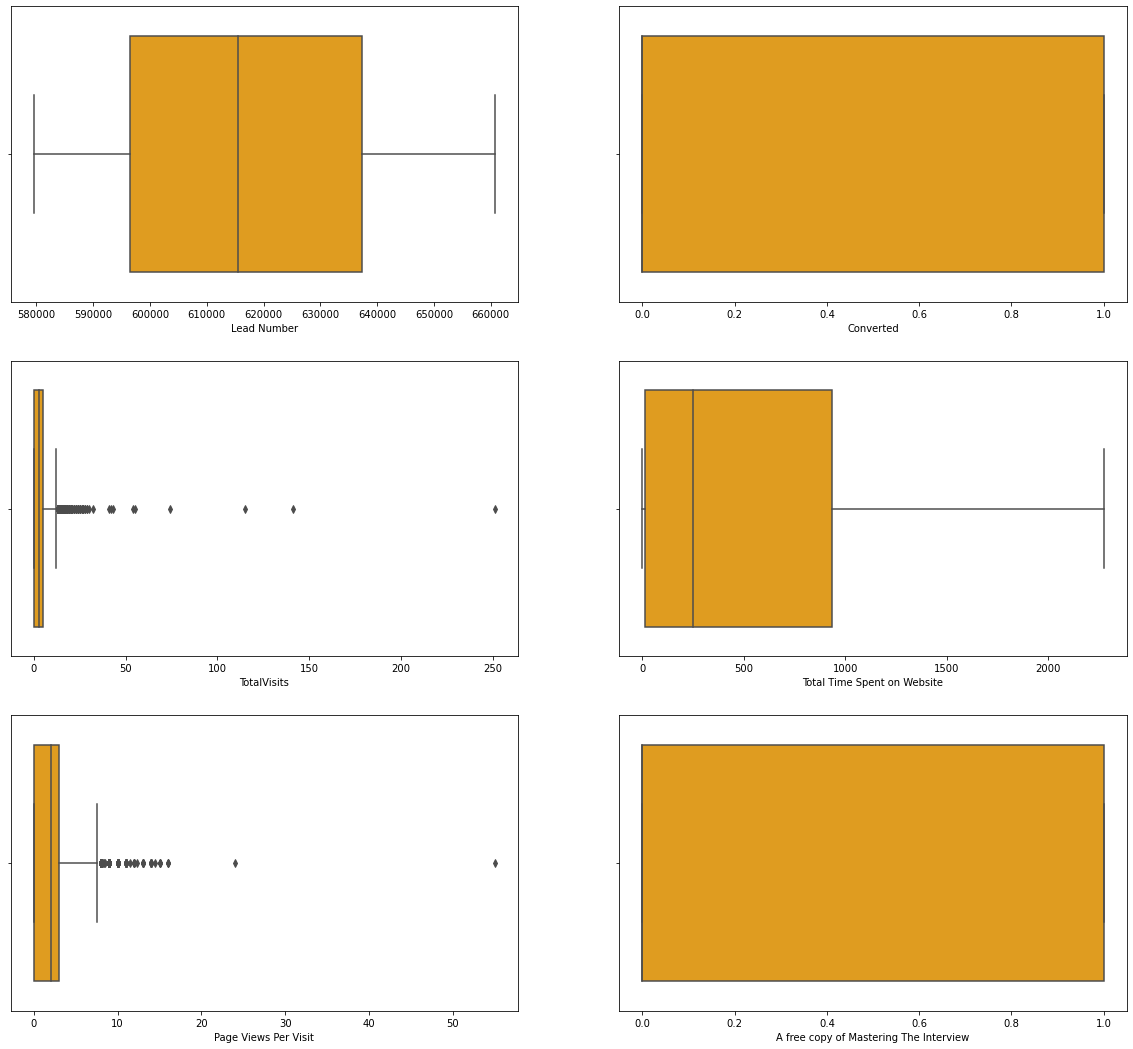

In [23]:
# Boxplot for checking outliers of numeric variables
num_cols = [x for x in leads_data.describe().columns]

plt.figure(figsize = (20, 25))
for i in range(len(num_cols)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x = num_cols[i], data = leads_data, color = 'orange')

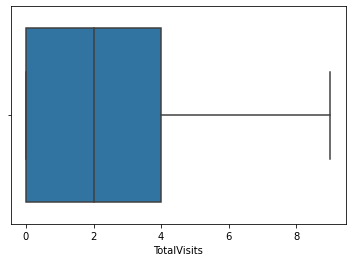

In [24]:
# Dropping 'TotalVisits' more than 10 (95 percentile) as they are very high compared to mean of 3.39
leads = leads_data[leads_data['TotalVisits'] < 10]
sns.boxplot(leads["TotalVisits"])
plt.show()

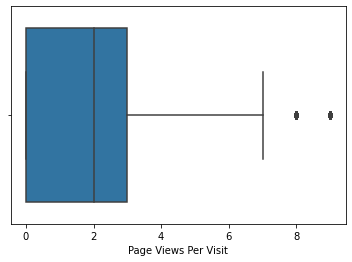

In [25]:
sns.boxplot(leads["Page Views Per Visit"])
plt.show()

Outliers in `Page Views Per Visit` also got handled when we treated outliers for `TotalVisits`.

Also, univariate analysis for numeric variables is hereby done.

#### 2c. Univariate, Bivariate & Multivariate Analysis

In [26]:
leads.shape

(8773, 11)

In [27]:
leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Unemployed,Better Career Prospects,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Unemployed,Better Career Prospects,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Student,Better Career Prospects,1


In [28]:
cat_cols = [x for x in leads.columns if x not in leads.describe().columns]
cat_cols = [x for x in cat_cols if x not in ('Prospect ID')]
cat_cols

['Lead Origin',
 'Lead Source',
 'What is your current occupation',
 'What matters most to you in choosing a course']

In [29]:
# Univariate analysis for categorical variables
def cat_bar_plots(col):
    plt.figure(figsize = (10, 5))
    dt = leads[col].value_counts(normalize = True)
    dt.plot.barh()
    for i, data in enumerate(dt):
        val = str(round(data, 1)) + '%'
        plt.text(x = data, y = i, s = f"{val}", fontdict = dict(fontsize = 10))
    plt.ylabel(col)
    plt.xlabel('count %')
    plt.show()

Variable: Lead Origin  ----------------------

Landing Page Submission    0.517953
API                        0.394278
Lead Add Form              0.081386
Lead Import                0.006269
Quick Add Form             0.000114
Name: Lead Origin, dtype: float64


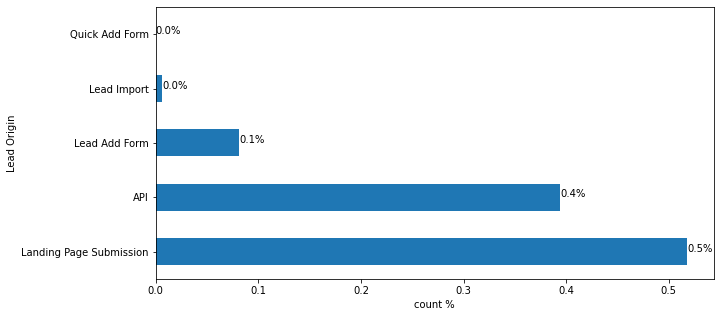

Variable: Lead Source  ----------------------

Google               0.316653
Direct Traffic       0.272541
Olark Chat           0.198222
Organic Search       0.114670
Reference            0.060641
Welingak Website     0.016072
Referral Sites       0.011969
Facebook             0.006269
bing                 0.000684
google               0.000570
Click2call           0.000342
Social Media         0.000228
Live Chat            0.000228
youtubechannel       0.000114
Press_Release        0.000114
testone              0.000114
Pay per Click Ads    0.000114
welearnblog_Home     0.000114
WeLearn              0.000114
blog                 0.000114
NC_EDM               0.000114
Name: Lead Source, dtype: float64


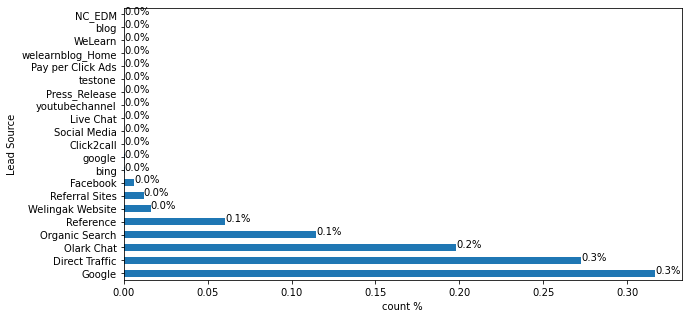

Variable: What is your current occupation  ----------------------

Unemployed              0.897640
Working Professional    0.075915
Student                 0.023139
Other                   0.001482
Housewife               0.001140
Businessman             0.000684
Name: What is your current occupation, dtype: float64


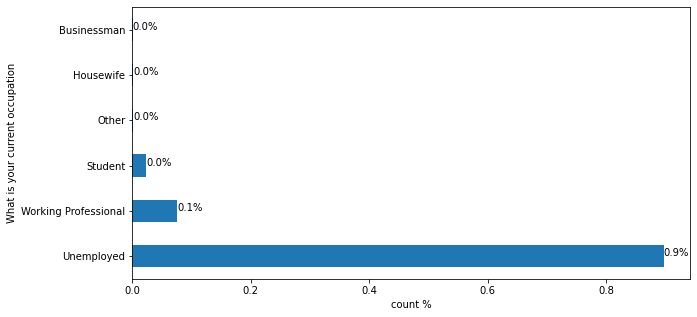

Variable: What matters most to you in choosing a course  ----------------------

Better Career Prospects      0.999658
Flexibility & Convenience    0.000228
Other                        0.000114
Name: What matters most to you in choosing a course, dtype: float64


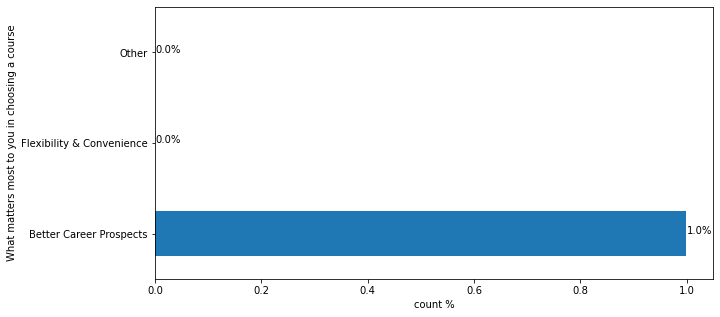

In [30]:
for i in range(len(cat_cols)):
    print("Variable: " + cat_cols[i] + '  ----------------------' + '\n')
    print(leads[cat_cols[i]].value_counts(normalize = True))
    cat_bar_plots(col = cat_cols[i])

**Note**: Based on above categorical variables analysis, we see that grouping the similar values/categories in single bucket within the variables makes sense.

##### Grouping Within Few Categorical Variables
> Lead Source

In [31]:
# Grouping all various forms of social media lead sources to 'Social Media' category itself
to_replace = [x for x in leads['Lead Source'].value_counts()[leads['Lead Source'].value_counts(normalize = True) < 0.0003].index]
leads = leads.replace(to_replace, "Social Media")

# Grouping 'google' to 'Google' category (as it's same search engine based origin - just different spelling)
to_replace = ['google']
leads = leads.replace(to_replace, "Google")

# Grouping 'Reference' to 'Referral Sites' category (as it's same meaning)
to_replace = ['Reference']
leads = leads.replace(to_replace, "Referral Sites")

leads['Lead Source'].value_counts(normalize = True)

Google              0.317223
Direct Traffic      0.272541
Olark Chat          0.198222
Organic Search      0.114670
Referral Sites      0.072609
Welingak Website    0.016072
Facebook            0.006269
Social Media        0.001368
bing                0.000684
Click2call          0.000342
Name: Lead Source, dtype: float64

> Lead Origin

In [32]:
# Grouping 'Lead Import' & 'Quick Add Form' to 'Lead Add Form' category itself (based on percentage distribution)
to_replace = ['Lead Import', 'Quick Add Form']
leads = leads.replace(to_replace, 'Lead Add Form')
leads['Lead Origin'].value_counts(normalize = True)

Landing Page Submission    0.517953
API                        0.394278
Lead Add Form              0.087769
Name: Lead Origin, dtype: float64

> Course Choosing Reason

In [33]:
# Renaming column
leads.rename(columns = {'What matters most to you in choosing a course': 'Course Reason'}, inplace = True)

# No grouping required as of now

> Current Occupation

In [34]:
# Renaming column
leads.rename(columns = {'What is your current occupation': 'Current Occupation'}, inplace = True)

# No grouping required as of now

In [35]:
# Updating category columns list with correct column names
cat_cols = [x for x in leads.columns if x not in leads.describe().columns]
cat_cols = [x for x in cat_cols if x not in ('Prospect ID')]
cat_cols

['Lead Origin', 'Lead Source', 'Current Occupation', 'Course Reason']

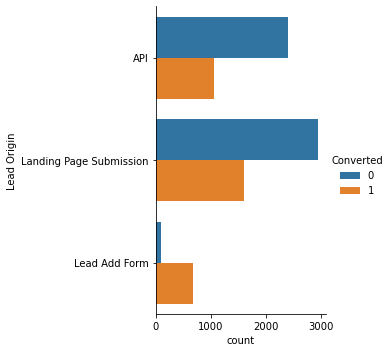

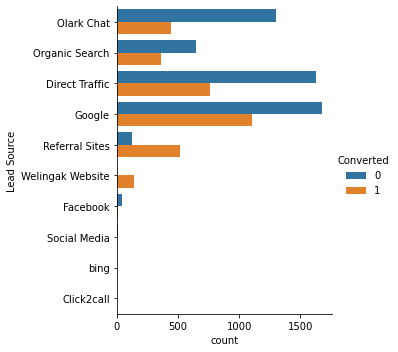

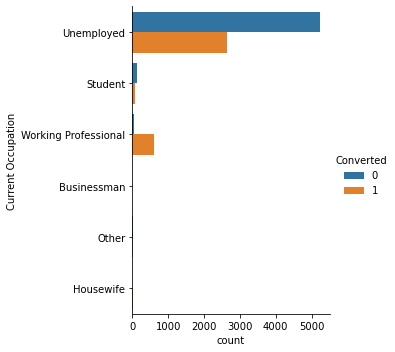

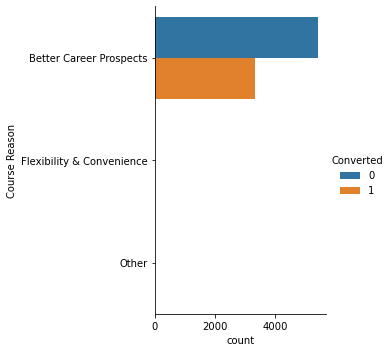

In [36]:
# Bivariate analysis for categorical variables against target variable
for i in range(len(cat_cols)):
    sns.catplot(y = cat_cols[i], hue = 'Converted', 
                    data = leads, kind = 'count')
    plt.show()

- <u>Observations</u>:
   1. 'Google', followed closely by 'Direct Traffic' are having highest conversion among all Lead Sources - good predictor for identifying hot leads
   2. People want 'Better Career Prospects' as the outcome for the courses to be considered a good fit for them
   > a. ~ Very less records found for 'Flexibility & Other' under 'Course Reason' (earlier named as 'What matters most in choosing course') attribute
   3. 'Unemployed' people have very bad conversion rate whereas 'Working Professionals' have good conversion rate - 'Current Occupation' is going to be a good indicator for identifying hot leads
   4. Lead Origin looks an okay indicator for hot leads identification - correlation needs to be looked at to identify relationship with target variable

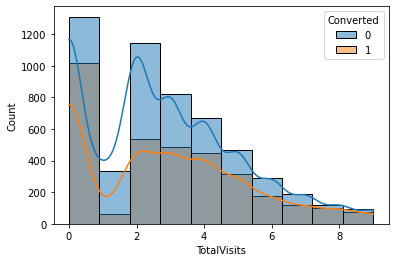

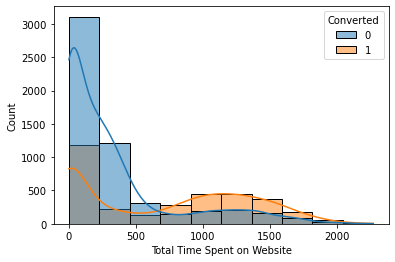

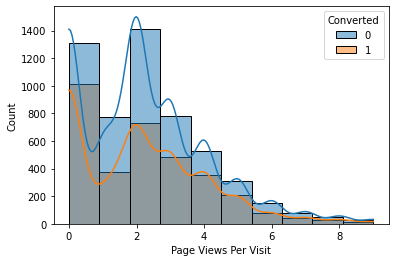

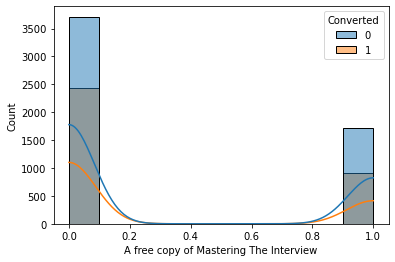

In [37]:
# Bivariate analysis for numerical variables
num_cols = [x for x in num_cols if x not in ('Lead Number', 'Converted')]

for i in range(len(num_cols)):
    sns.histplot(x = num_cols[i], bins = 10, hue = 'Converted', kde = True,
                 data = leads)
    plt.show()

- <u>Observations</u>:
   1. If `Total Time Spent on Website` is in good range, we have good lead conversion rate
   2. As `Total Visits` and `Page views Per Visit` increase, the conversion seems to lessen indicating weak or negative correlation with target variable
   3. Free copy of interview class inclusion needs to be looked at to identify relationship with target variable

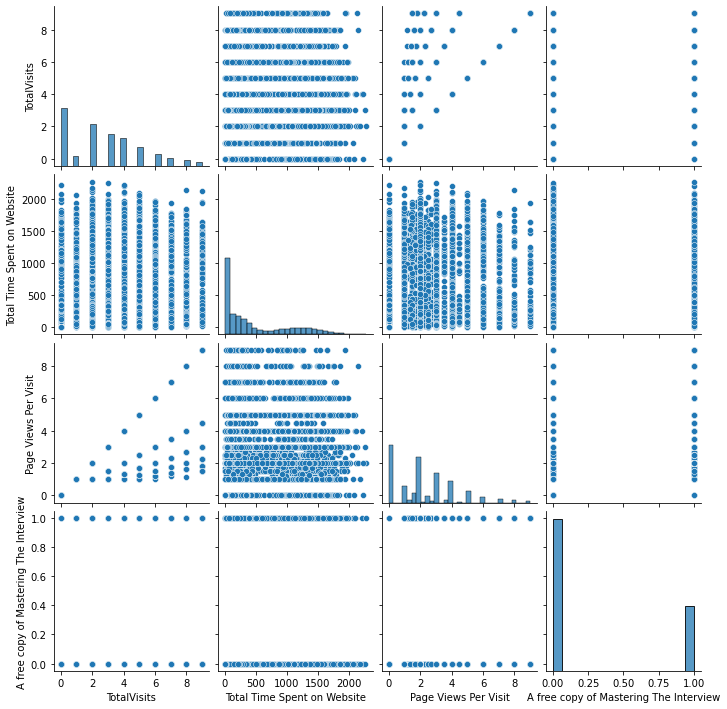

In [38]:
# Multivariate analysis
sns.pairplot(data = leads[num_cols])
plt.show()

### 3. Data Imbalance and Correlation Checks

0    61.9
1    38.1
Name: Converted, dtype: float64


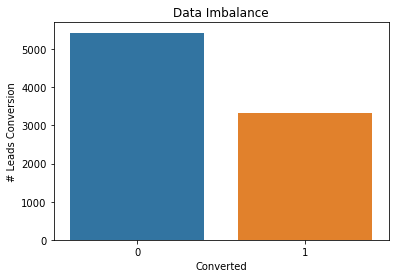

In [39]:
# Understanding data imbalance in leads dataset
print(100 * leads.Converted.value_counts(normalize = True).round(3))

sns.barplot(x = leads.Converted.unique(), y = leads.Converted.value_counts())
plt.ylabel('# Leads Conversion')
plt.xlabel('Converted')
plt.title('Data Imbalance')
plt.show()

**Imbalance Ratio (IR)** is the proportion of the number of instances in the negative class to the number of instances in the positive one. Here, in our leads data, the negative class becomes the 'non converted (0)' and the positive class becomes the 'converted (1)' for the leads identification.

In [40]:
leads.Converted.value_counts()

0    5434
1    3339
Name: Converted, dtype: int64

In [41]:
non_convert_neg_cnt = leads.Converted.value_counts()[0].round(3)
convert_pos_cnt = leads.Converted.value_counts()[1].round(3)

In [42]:
# Calculating IR
print("Non Converted: {0}%".format(100 * leads.Converted.value_counts(normalize = True)[0].round(3)))
print("Converted: {0}%".format(100 * leads.Converted.value_counts(normalize = True)[1].round(3)))
print("Imbalance Ratio:", round(convert_pos_cnt/non_convert_neg_cnt, 2))

Non Converted: 61.9%
Converted: 38.1%
Imbalance Ratio: 0.61


**Note**: _If there is a greater imbalance ratio, the output is biased to the class which has a higher number of examples_

**KEY INSIGHT**:
> Since, our leads data has _imbalance ratio of 0.61_, which is _very less (negligible)_, our output will not be biased to class of non converted (as non-converters class have higher count of examples). This is good for our analysis.

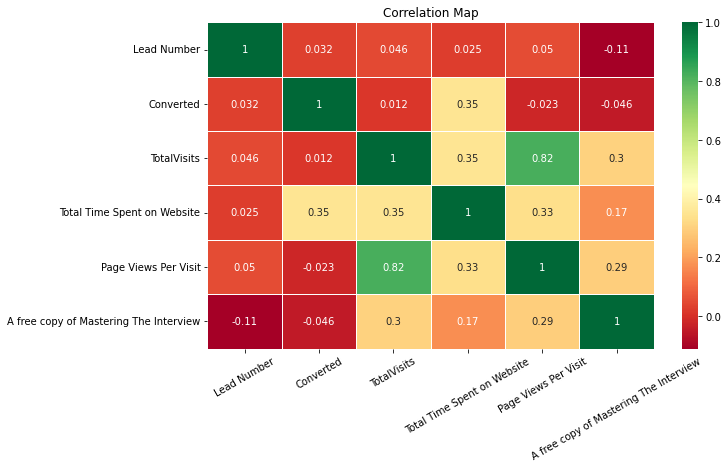

In [43]:
# Plotting heatmap to check correlation between data variables
plt.figure(figsize = (10,6))
sns.heatmap(leads.corr(), cmap = 'RdYlGn', annot = True, linewidth = 1)
plt.title('Correlation Map')
plt.xticks(rotation = 30)
plt.show()

- <u>Observations</u>:
   1. `TotalVisits` is weakly correlated with `Converted`
   2. `Page Views Per Visit` is negatively correlated with `Converted` target variable
    > a. This is very highly correlated with 0.82 correlation with `TotalVisits` and we'll be dropping this variable as information of page visits is captured in the total variable itself 
   3. `Total Time Spent on Website` is having moderate correlation with `Converted` target variable
   4. 'Free copy of Mastering Interview' is highest correlated with `Converted` for leads amongst all numeric predictors - shows its inclusion might be important in converting the leads

In [44]:
# Dropping due to high correlation with TotalVisits
leads.drop(["Page Views Per Visit"], axis = 1, inplace = True)
num_cols = [x for x in num_cols if x != 'Page Views Per Visit']

### 4. Data Prep for Model Building

#### 4a. Dummy Variables Creation

In [45]:
dummy_conversion = pd.get_dummies(leads[cat_cols],
                                  drop_first = True)

In [46]:
df_leads = pd.concat([leads, dummy_conversion], axis = 1)
df_leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Current Occupation,Course Reason,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_bing,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Course Reason_Flexibility & Convenience,Course Reason_Other
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,Unemployed,Better Career Prospects,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,Student,Better Career Prospects,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [47]:
# Dropping variables for which dummies have been created as they are redundant
df_leads.drop(cat_cols, axis = 1, inplace = True)
df_leads.shape

(8773, 24)

#### 4b. Train Test Split

In [48]:
# Removing target variable and leads sequencing variables from features data 'X'
X = df_leads.drop(['Prospect ID', 'Lead Number', 'Converted'], axis = 1)
y = df_leads['Converted']

In [49]:
# Setting the seed so train and test data split is consistent with multiple iterations
np.random.seed(0)

# Splitting into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7,
                                                    test_size = 0.3,
                                                    random_state = 100)

In [50]:
# Shapes of train and test splits
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (6141, 21)
X_test:  (2632, 21)
y_train:  (6141,)
y_test:  (2632,)


#### 4c. Feature Scaling

In [51]:
# Instantiating standard scaler object
scaler = StandardScaler()

# Applying scaling fit transformation on numeric columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head(3)

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_bing,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Course Reason_Flexibility & Convenience,Course Reason_Other
5602,0.096941,0.564722,1.520624,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5036,-1.168783,-0.864237,-0.657625,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8970,-0.746875,-0.271292,-0.657625,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [52]:
# Checking scaling on nominal variables
X_train.describe()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Lead Source_bing,Current Occupation_Housewife,Current Occupation_Other,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional,Course Reason_Flexibility & Convenience,Course Reason_Other
count,6.141000e+03,6.141000e+03,6.141000e+03,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.00000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000
mean,-7.766680e-17,2.088651e-16,-3.212614e-16,0.517505,0.089073,0.274874,0.006514,0.317864,0.20013,0.109754,0.073604,0.001466,0.015633,0.000163,0.001140,0.001466,0.024263,0.900342,0.072464,0.000326,0.000163
std,1.000081e+00,1.000081e+00,1.000081e+00,0.499734,0.284873,0.446487,0.080450,0.465684,0.40013,0.312608,0.261146,0.038258,0.124060,0.012761,0.033746,0.038258,0.153878,0.299568,0.259275,0.018045,0.012761
min,-1.168783e+00,-8.642366e-01,-6.576247e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.168783e+00,-8.642366e-01,-6.576247e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-3.249673e-01,-4.333392e-01,-6.576247e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.188484e-01,7.728053e-01,1.520624e+00,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.628387e+00,3.218240e+00,1.520624e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Checking current conversion rate before model building process
conversion_rate = round(100 *(sum(df_leads["Converted"])/len(df_leads["Converted"].index)), 3)
conversion_rate

38.06

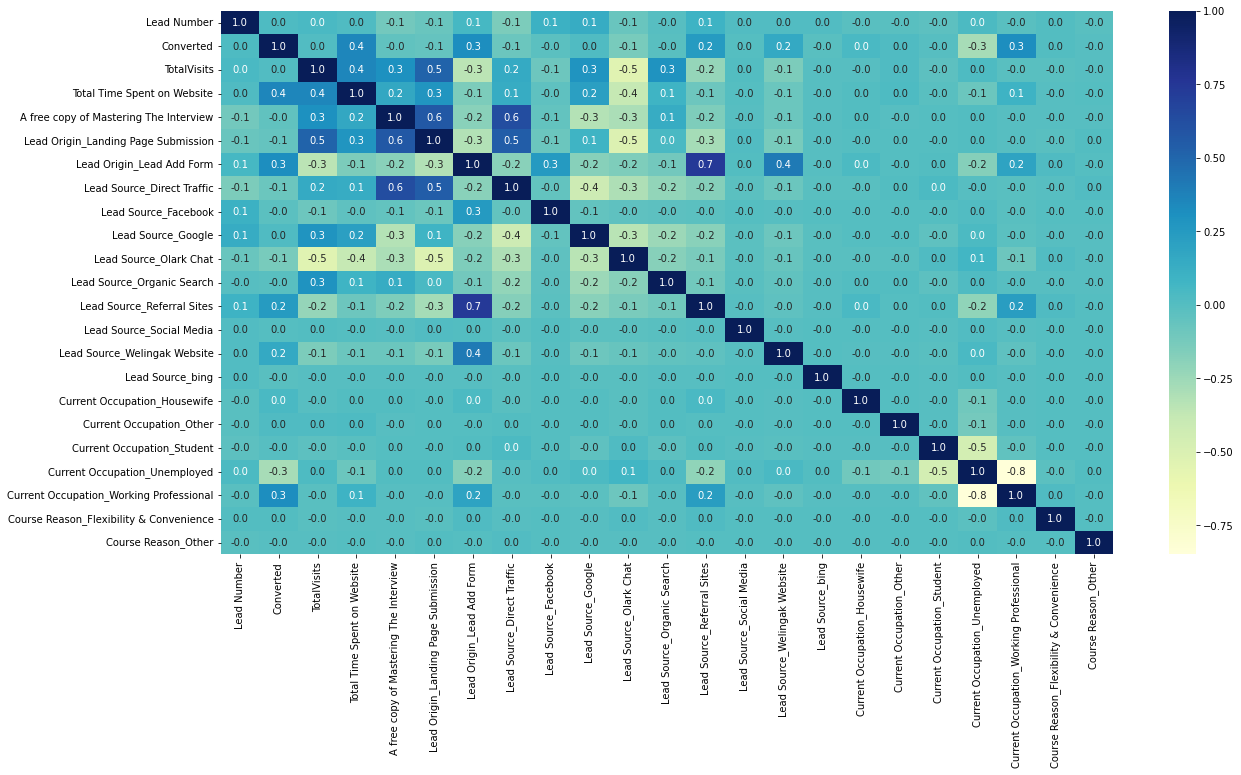

In [54]:
# Checking correlation of final leads data set through heat Map
plt.figure(figsize = (20, 10))
sns.heatmap(df_leads.corr(),cmap = 'YlGnBu', fmt = ".1f", annot = True)
plt.xticks(rotation = 90)
plt.show()

<u>Observations</u>:
We see that few variables are highly correlated with each other, which might result in multicollinearity. We shall address this after p-value elimination and final VIF check while building the model in iterative process.

### 5. Feature Selection using RFE

In [55]:
# List of independent variables
print('Predictors count:', len(X_train.columns))
print(X_train.columns)

Predictors count: 21
Index(['TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Current Occupation_Housewife',
       'Current Occupation_Other', 'Current Occupation_Student',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional',
       'Course Reason_Flexibility & Convenience', 'Course Reason_Other'],
      dtype='object')


- Since we have 20 predictor variables to be considered for building a logistic model, we'll first perform automated feature selection (coarse tuned) using RFE `Recursive Feature Elimination`. After downsizing on the predictors' using RFE, we'll then move to manual feature selection (fine tuned) approach.  

In [56]:
# Instantiating linear regression modeling object
lm = LogisticRegression()

# Getting model fit 
lm.fit(X_train, y_train)

# Running RFE with the output number of the variables equal to 15
rfe = RFE(lm, n_features_to_select = 15)

# Fitting RFE
rfe = rfe.fit(X_train, y_train)

In [57]:
# Creating dataframe of rfe output (list of top 15 predictors) and sorting by rfe ranking
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Support': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by = 'Ranking')

,Predictor,Support,Ranking
0,TotalVisits,True,1
1,Total Time Spent on Website,True,1
18,Current Occupation_Working Professional,True,1
3,Lead Origin_Landing Page Submission,True,1
4,Lead Origin_Lead Add Form,True,1
17,Current Occupation_Unemployed,True,1
6,Lead Source_Facebook,True,1
8,Lead Source_Olark Chat,True,1
16,Current Occupation_Student,True,1
19,Course Reason_Flexibility & Convenience,True,1


In [58]:
# Checking the predictor columns based on RFE
pred_cols = X_train.columns[rfe.support_]
print(pred_cols)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Current Occupation_Housewife',
       'Current Occupation_Other', 'Current Occupation_Student',
       'Current Occupation_Unemployed',
       'Current Occupation_Working Professional',
       'Course Reason_Flexibility & Convenience'],
      dtype='object')


In [59]:
# Checking the columns eliminated using RFE - to make sure we do not remove any good predictor that makes business sense
non_pred_cols = X_train.columns[~rfe.support_]
print(non_pred_cols)

Index(['A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Course Reason_Other'],
      dtype='object')


In [60]:
# Creating X_train dataframe with RFE selected predictor variables
X_train_rfe = X_train[pred_cols]

# Checking shape
X_train_rfe.shape

(6141, 15)

> <i> We'll now move on to manual feature selection approach by building logistic models iteratively - checking model summary statistics to build the best logistic model for our problem statement.

### 6. Model Building Iterations on Train Data

#### Model 1:

In [61]:
## We will be using statsmodel.api to build models as it provides detailed statistical summary of models built

# Adding a constant variable (since statsmodel assumes zero-intercept model by default)
X_train_1 = sm.add_constant(X_train_rfe)

# Building a fitted model
lm_1 = sm.GLM(y_train, X_train_1, family = sm.families.Binomial()).fit()

# Getting model summary statistics
print(lm_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6125
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.9
Date:                Tue, 15 Nov 2022   Deviance:                       5831.8
Time:                        22:30:11   Pearson chi2:                 7.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3140
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

- Looking at p-values, many columns might not be significant. Let's drop the most insignificant variables after VIF check.

In [62]:
# Checking VIF also before dropping variable based on p-value
X_train_vif = X_train_1.drop('const', 1)    # dropping constant and saving in new dataset
vif = pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features'] = X_train_vif.columns       # Adding final train dataset features

# Now calculating VIF
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Rounding the vif values
vif['VIF'] = round(vif['VIF'], 2)

# Sorting the vif dataset
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,Current Occupation_Unemployed,4.93
2,Lead Origin_Landing Page Submission,3.72
5,Lead Source_Olark Chat,2.98
3,Lead Origin_Lead Add Form,2.28
0,TotalVisits,1.97
13,Current Occupation_Working Professional,1.46
1,Total Time Spent on Website,1.27
7,Lead Source_Welingak Website,1.26
11,Current Occupation_Student,1.12
4,Lead Source_Facebook,1.10


In [63]:
# Dropping the most insignificant variable ('Current Occupation_Other') based on highest p-value (& negligible business importance)
X_train_2 = X_train_1.drop(['Current Occupation_Other', 'const'], axis = 1)

#### Model 2:

In [64]:
# Adding a constant variable (since statsmodel assumes zero-intercept model by default)
X_train_2 = sm.add_constant(X_train_2)

# Building a fitted model
lm_2 = sm.GLM(y_train, X_train_2, family = sm.families.Binomial()).fit()

# Getting model summary statistics
print(lm_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6126
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.2
Date:                Tue, 15 Nov 2022   Deviance:                       5832.4
Time:                        22:30:11   Pearson chi2:                 7.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3140
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [65]:
# Dropping the most insignificant variable ('Lead Source_bing')
X_train_3 = X_train_2.drop(['Lead Source_bing', 'const'], axis = 1)

#### Model 3:

In [66]:
# Adding a constant variable (since statsmodel assumes zero-intercept model by default)
X_train_3 = sm.add_constant(X_train_3)

# Building a fitted model
lm_3 = sm.GLM(y_train, X_train_3, family = sm.families.Binomial()).fit()

# Getting model summary statistics
print(lm_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6127
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.4
Date:                Tue, 15 Nov 2022   Deviance:                       5832.9
Time:                        22:30:11   Pearson chi2:                 7.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3139
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [67]:
# Dropping the most insignificant variable ('Current Occupation_Housewife')
X_train_4 = X_train_3.drop(['Current Occupation_Housewife', 'const'], axis = 1)

#### Model 4:

In [68]:
# Adding a constant variable (since statsmodel assumes zero-intercept model by default)
X_train_4 = sm.add_constant(X_train_4)

# Building a fitted model
lm_4 = sm.GLM(y_train, X_train_4, family = sm.families.Binomial()).fit()

# Getting model summary statistics
print(lm_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6128
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2919.1
Date:                Tue, 15 Nov 2022   Deviance:                       5838.1
Time:                        22:30:11   Pearson chi2:                 7.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3133
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [69]:
# Dropping the most insignificant variable ('Lead Source_Social Media) as per high p-value 
X_train_5 = X_train_4.drop(['Lead Source_Social Media', 'const'], axis = 1)

#### Model 5:

In [70]:
# Adding a constant variable (since statsmodel assumes zero-intercept model by default)
X_train_5 = sm.add_constant(X_train_5)

# Building a fitted model
lm_5 = sm.GLM(y_train, X_train_5, family = sm.families.Binomial()).fit()

# Getting model summary statistics
print(lm_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6129
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2919.1
Date:                Tue, 15 Nov 2022   Deviance:                       5838.3
Time:                        22:30:11   Pearson chi2:                 7.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3133
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [71]:
# Dropping the highest p-value insignificant variable ('Course Reason_Flexibility & Convenience')
X_train_6 = X_train_5.drop(['Course Reason_Flexibility & Convenience', 'const'], axis = 1)

#### Model 6:

In [72]:
# Adding a constant variable (since statsmodel assumes zero-intercept model by default)
X_train_6 = sm.add_constant(X_train_6)

# Building a fitted model
lm_6 = sm.GLM(y_train, X_train_6, family = sm.families.Binomial()).fit()

# Getting model summary statistics
print(lm_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6130
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2919.3
Date:                Tue, 15 Nov 2022   Deviance:                       5838.6
Time:                        22:30:11   Pearson chi2:                 7.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3133
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [73]:
# Checking VIF also before dropping variable based on p-value
X_train_vif = X_train_6.drop('const', 1)    # dropping constant and saving in new dataset
vif = pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features'] = X_train_vif.columns       # Adding final train dataset features

# Now calculating VIF
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Rounding the vif values
vif['VIF'] = round(vif['VIF'], 2)

# Sorting the vif dataset
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,Current Occupation_Unemployed,4.88
2,Lead Origin_Landing Page Submission,3.68
5,Lead Source_Olark Chat,2.95
3,Lead Origin_Lead Add Form,2.25
0,TotalVisits,1.97
9,Current Occupation_Working Professional,1.45
1,Total Time Spent on Website,1.27
6,Lead Source_Welingak Website,1.26
7,Current Occupation_Student,1.12
4,Lead Source_Facebook,1.10


In [74]:
# Dropping the most insignificant variable ('Current Occupation_Student')
X_train_7 = X_train_6.drop(['Current Occupation_Student', 'const'], axis = 1)

#### Model 7:

In [75]:
# Adding a constant variable (since statsmodel assumes zero-intercept model by default)
X_train_7 = sm.add_constant(X_train_7)

# Building a fitted model
lm_7 = sm.GLM(y_train, X_train_7, family = sm.families.Binomial()).fit()

# Getting model summary statistics
print(lm_7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6131
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2920.5
Date:                Tue, 15 Nov 2022   Deviance:                       5840.9
Time:                        22:30:12   Pearson chi2:                 7.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3130
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [76]:
# Checking VIF also before dropping variable based on p-value
X_train_vif = X_train_7.drop('const', 1)     # dropping constant and saving in new dataset
vif = pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features'] = X_train_vif.columns       # Adding final train dataset features

# Now calculating VIF
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Rounding the vif values
vif['VIF'] = round(vif['VIF'], 2)

# Sorting the vif dataset
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,Current Occupation_Unemployed,4.48
2,Lead Origin_Landing Page Submission,3.36
5,Lead Source_Olark Chat,2.79
3,Lead Origin_Lead Add Form,2.17
0,TotalVisits,1.97
8,Current Occupation_Working Professional,1.41
1,Total Time Spent on Website,1.26
6,Lead Source_Welingak Website,1.26
4,Lead Source_Facebook,1.10


In [77]:
# Dropping the most insignificant variable ('Current Occupation_Unemployed')
X_train_8 = X_train_7.drop(['Current Occupation_Unemployed', 'const'], axis = 1)

#### Model 8:

In [78]:
# Adding a constant variable (since statsmodel assumes zero-intercept model by default)
X_train_8 = sm.add_constant(X_train_8)

# Building a fitted model
lm_8 = sm.GLM(y_train, X_train_8, family = sm.families.Binomial()).fit()

# Getting model summary statistics
print(lm_8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6132
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2921.5
Date:                Tue, 15 Nov 2022   Deviance:                       5843.0
Time:                        22:30:12   Pearson chi2:                 7.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3128
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [79]:
# Checking VIF to make sure of finalizing model results

X_train_vif = X_train_8.drop('const', 1)     # dropping constant and saving in new dataset
vif = pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features'] = X_train_vif.columns       # Adding final train dataset features

# Now calculating VIF
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Rounding the vif values
vif['VIF'] = round(vif['VIF'], 2)

# Sorting the vif dataset
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,TotalVisits,1.92
3,Lead Origin_Lead Add Form,1.69
5,Lead Source_Olark Chat,1.54
2,Lead Origin_Landing Page Submission,1.29
6,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.25
7,Current Occupation_Working Professional,1.16
4,Lead Source_Facebook,1.10


- <u>Observations</u>:
> For **Model 8**, we see that -
   1. All VIF values are within range, so we have addressed multicollinearity in the model
   2. All predictor variables are statistically significant

Thus, Model 8 seems a good fit. So, we have **Model 8 as the final model** to be now analysed further wrt. model evaluation metrics and finding optimal threshold via ROC Curve.

#### Making Final Model (Model 8) Predictions

In [80]:
# Predicting the train dataset with our final model (Model 8)
y_train_pred = lm_8.predict(X_train_8)

# Creating a new dataset with predicted values
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_probability': y_train_pred,' ID': y_train.index})
y_train_pred_final.head()

,Converted,Converted_probability,ID
5602,1,0.327565,5602
5036,1,0.796343,5036
8970,0,0.158031,8970
5328,0,0.124938,5328
1929,0,0.165918,1929


#### ROC Curve
ROC curve shows the trade off between sensitivity and specificity - means if sensitivity increases, specificity will decrease. It will help us in finding the `optimal threshold` for the cut-off value.

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.3f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability,
                                         drop_intermediate = False)

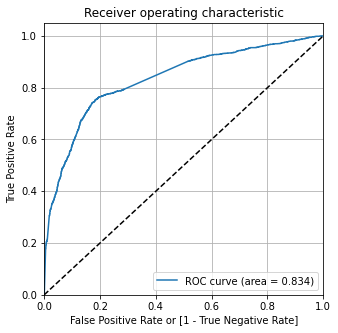

In [83]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

In [84]:
# Creating 10 points out of which one we will choose for our cut-off point as threshold

numbers = [float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)
            #  Mapping the probablities for each of the 10 points

y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5602,1,0.327565,5602,1,1,1,1,0,0,0,0,0,0
5036,1,0.796343,5036,1,1,1,1,1,1,1,1,0,0
8970,0,0.158031,8970,1,1,0,0,0,0,0,0,0,0
5328,0,0.124938,5328,1,1,0,0,0,0,0,0,0,0
1929,0,0.165918,1929,1,1,0,0,0,0,0,0,0,0


**Note**: Now, after creating the above series of points, we will check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding `Accuracy`, `Sensitivity` and `Specificity` for each point. These three evaluation metrics will tell us how good our model is - whether it is having good accuracy or number of relevant data points is high or low, recall, etc.

In [85]:
# Calculating accuracy, sensitivity and specificity with different probability cutoffs

df_cutoffs = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitvity', 'Specificity'])

# from 0 to 0.9 with set size 0.1
var = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix = confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total = sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy = (cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity = cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity = cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i] = [i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier

# Viewing cutoff data
print(df_cutoffs)

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.378440    1.000000     0.000000
0.1          0.1  0.406611    0.994406     0.048729
0.2          0.2  0.638658    0.904905     0.476552
0.3          0.3  0.792216    0.750430     0.817658
0.4          0.4  0.794170    0.696213     0.853812
0.5          0.5  0.784888    0.623494     0.883154
0.6          0.6  0.770559    0.530981     0.916427
0.7          0.7  0.753949    0.432014     0.949961
0.8          0.8  0.732617    0.333477     0.975635
0.9          0.9  0.689790    0.189759     0.994236


#### Finding optimal threshold/cut-off value

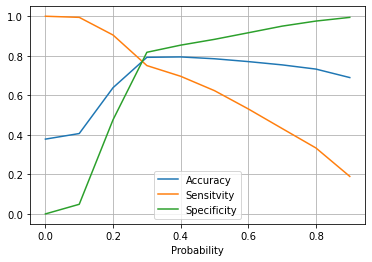

In [86]:
# Plotting 'Accuracy', 'Sensitivity' and 'Specificity' for various probabilities (0.0 to 0.9) created above
df_cutoffs.plot.line(x = 'Probability', y = ['Accuracy','Sensitvity','Specificity'])
plt.grid()
plt.show()

From the above curve, we can see that nearly 0.3 is the optimum point for considering probability cutoff value.

In [87]:
# Predicted value using cut-off
y_train_pred_final['Predicted'] = y_train_pred_final['Converted_probability'].map(lambda x:1 if x > 0.3 else 0)  
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
5602,1,0.327565,5602,1,1,1,1,0,0,0,0,0,0,1
5036,1,0.796343,5036,1,1,1,1,1,1,1,1,0,0,1
8970,0,0.158031,8970,1,1,0,0,0,0,0,0,0,0,0
5328,0,0.124938,5328,1,1,0,0,0,0,0,0,0,0,0
1929,0,0.165918,1929,1,1,0,0,0,0,0,0,0,0,0


In [88]:
# Creating confusion matrix to get the precision and recall score on predictions
confusion_pr = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion_pr

array([[3121,  696],
       [ 580, 1744]], dtype=int64)

In [89]:
print('Precision: ', confusion_pr[1,1]/(confusion_pr[0,1] + confusion_pr[1,1]))    # Printing Pecision score
print('Recall: ', confusion_pr[1,1]/(confusion_pr[1,0] + confusion_pr[1,1]))       # Printing Recall score
print('Accuracy: ', (confusion_pr[0,0] + confusion_pr[1,1])/confusion_pr.sum())    # Printing Accuracy score

Precision:  0.7147540983606557
Recall:  0.7504302925989673
Accuracy:  0.7922162514248494


**Note**: As per our business objective, the recall percentage is more valuable because it is okay if our precision is little low which means lesser hot leads, but we don't want to miss out on any hot leads who are willing to get converted, thereby increasing the conversion rate (our main goal). Hence, our focus will be more on Recall than Precision.

#### Precision and Recall Trade-Off

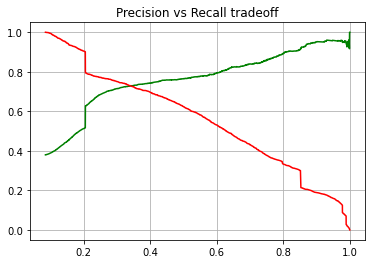

In [90]:
# Plotting precision recall curve by creating three points and plotting
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting Precision (green line)
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall (red line)
plt.grid()
plt.show()

### 7. Testing the Final Model on Test Data

In [91]:
# Scaling the numeric variables as per train data scaling fit
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [92]:
# Predicting the test dataset with our final model - Model 8
test_cols = X_train_8.columns[1:]              # Taking the same column train set has
X_test_final = X_test[test_cols]               # Updating it in the final test set
X_test_final = sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test = lm_8.predict(X_test_final)       # Predicting the final test set

In [93]:
# Creating a new dataset with predicted values
y_test_pred_final = pd.DataFrame({'Converted': y_test.values, 'Converted_Probability': y_pred_test, 'P ID': y_test.index})
y_test_pred_final.head()

,Converted,Converted_Probability,P ID
4595,0,0.661665,4595
898,0,0.112749,898
6597,0,0.123644,6597
8303,0,0.104214,8303
4300,0,0.586048,4300


### 8. Model Evaluation/Validation

In [94]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset

y_test_pred_final['Predicted'] = y_test_pred_final['Converted_Probability'].map(lambda x:1 if x > 0.3 else 0) 
y_test_pred_final.head()

,Converted,Converted_Probability,P ID,Predicted
4595,0,0.661665,4595,1
898,0,0.112749,898,0
6597,0,0.123644,6597,0
8303,0,0.104214,8303,0
4300,0,0.586048,4300,1


In [95]:
# Checking the accuracy of the test dataset
print('Accuracy score in predicting test dataset:',
      metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

Accuracy score in predicting test dataset: 0.7925531914893617


In [96]:
# Printing the precision score
print('Precision score in predicting test dataset:',
      precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

# Printing the recall score
print('Recall score in predicting test dataset:',
      recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

Precision score in predicting test dataset: 0.7161290322580646
Recall score in predicting test dataset: 0.7655172413793103


In [97]:
# Creating new columns for lead number and lead score from predicted values dataframe

y_test_pred_final['Lead Number'] = leads_data.iloc[y_test_pred_final['P ID'], 1]
y_test_pred_final['Lead Score'] = y_test_pred_final['Converted_Probability'].apply(lambda x: round(x * 100))

In [98]:
y_test_pred_final_results = y_test_pred_final[['Lead Number', 'Lead Score', 'Predicted']]
y_test_pred_final_results.set_index(["Lead Number"], inplace = True)
y_test_pred_final_results.head(5)

,Lead Score,Predicted
Lead Number,,
615719,66,1
650862,11,0
599140,12,0
586447,10,0
618575,59,1


In [99]:
print("Original conversion rate was:", round(conversion_rate, 3))

Original conversion rate was: 38.06


In [100]:
conversion_rate_model = 100 * sum(y_test_pred_final_results["Predicted"])/len(y_test_pred_final_results["Predicted"].index)
print("Model based conversion rate is:", round(conversion_rate_model, 3))

Model based conversion rate is: 41.223


In [101]:
print("Model Overall Accuracy Percentage on Test Data is:",
      round(100 * (metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)), 3))

Model Overall Accuracy Percentage on Test Data is: 79.255


### 9. Model Summary & Recommendations

We can see that we after our model build, the company's sales team will be able to identify **79.3% of hot leads** accurately with a **recall score of 76.5%** (sensitivity) - this will enable the company to attain a higher conversion rate based on a good identification of promising leads.

- We have arrived at a good model for the hot leads identification with the significant variables.
- We can see that the equation of the best fitted line is:

$Converted$ = $-1.174$ + $0.272 \times TotalVisits$ + $1.091 \times Total Time Spent on Website$ + $-0.187 \times Lead Origin Landing Page Submission$ + $4.180 \times Lead Origin Lead Add Form$ + $-3.441 \times Lead Source Facebook$ + $1.079 \times Lead Source Olark Chat$ + $2.024 \times Lead Source Welingak Website$ + $2.719 \times Current Occupation Working Professional$

#### Train and Test model - Metrics comparison:
1. Training Accuracy: 79.2%
2. Testing Accuracy: 79.3%

- The _top 3 features_ for a good conversion rate are:
1. Lead Origin_Lead Add Form with the coefficient of 4.18
2. Current Occupation_Working Professional with the coefficient of 2.719
3. Lead Source_Welingak Website with the coefficient of 2.024

#### Recommendations:
1. 'Lead Add Form' as origin for lead customers identifier is the best. So, XEducation can do more promotions on this lead origin identifier and focus on customer targeting using the same
2. XEducation's sales team should focus more on leads whose current occupation is 'Working Professional' as they represent good target base for lead conversion
4. 'Welingak Website' as the Lead source is very effective for getting promising leads, so XEducation can provide some promotional discounts to increase traffic and lead conversion using this source.
    a. Also, Olark Chat is a good lead source as well, so sales team can put resources on this as well
5. 'Lead Source_Facebook' is having a negative coefficient of -0.3441, so Sales team should look into this lead source mode and not put more investment on it

*------------------------------------------------------------------------------------------- Complete -------------------------------------------------------------------------------------------* 